# Data Loading
Load csv files and concat them.

In [1]:
!git clone https://github.com/christianadriano/RL_4_SelfHealingSystems.git

fatal: destination path 'RL_4_SelfHealingSystems' already exists and is not an empty directory.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import os
import pandas as pd
import numpy

frames = []

for root, dirs, files in os.walk('/content/RL_4_SelfHealingSystems/data'):
    for f in files:
        if f.endswith(".csv"):
            file_path = os.path.join(root, f)
            dataframe = pd.read_csv(file_path)
            dataframe.columns=dataframe.columns.str.replace('\t','')
            frames.append(dataframe)

data = pd.concat(frames, sort=False)[['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule', 'Optimal_Utility_Increase']]
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Optimal_Affected_Component,Optimal_Failure,Optimal_Rule,Optimal_Utility_Increase
0,Query Service,CF1,RestartComponent,49.5
1,User Management Service,CF2,RestartComponent,16.0
2,Authentication Service,CF3,ReplaceComponent,31.5
3,Bid and Buy Service,CF3,HwRedeployComponent,25.0
4,Item Management Service,CF3,HwRedeployComponent,16.0


# Task 1: Plot the distribution of rewards for each repair-action <component, failure, rule>

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72]), <a list of 72 Text major ticklabel objects>)

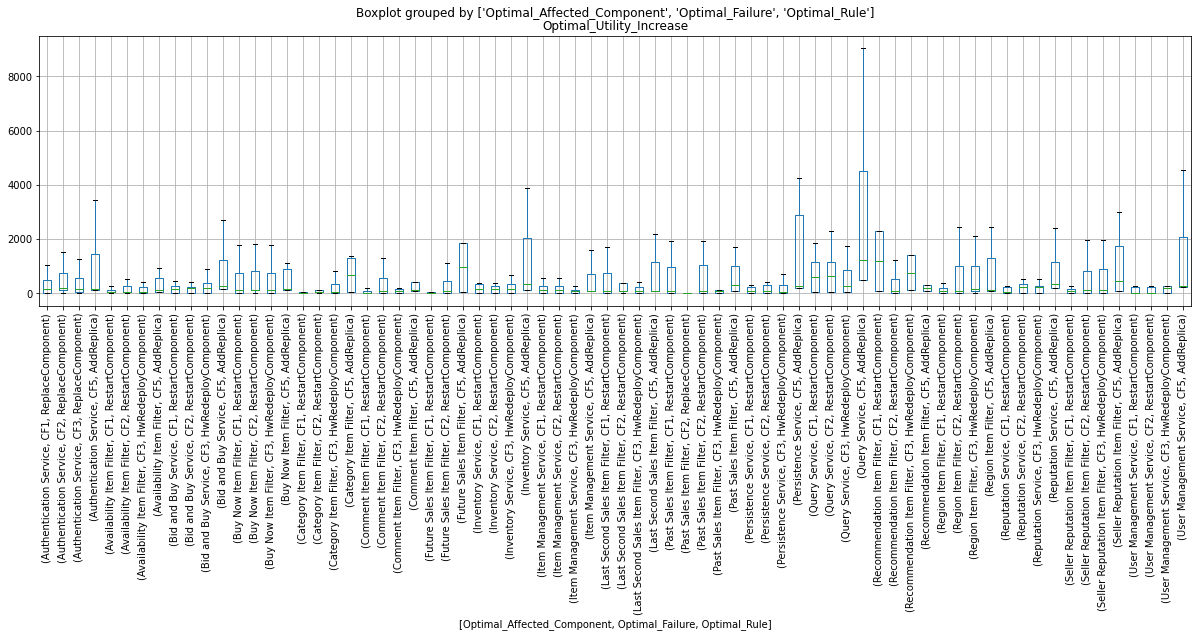

In [8]:
import matplotlib.pyplot as plt
data.boxplot(by=['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule'], figsize=(20,5), showfliers=False)
plt.xticks(rotation='vertical')

# Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

In [0]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(['mean', 'median', pd.Series.mode, 'std', 'skew', pd.DataFrame.kurt])

Optimal_Utility_Increase  ...           
                                                                                      mean  ...       kurt
Optimal_Affected_Component    Optimal_Failure Optimal_Rule                                  ...           
Authentication Service        CF1             ReplaceComponent                  550.493509  ...   7.822911
                              CF2             ReplaceComponent                  646.809870  ...   6.778994
                              CF3             ReplaceComponent                  651.221800  ...   3.606384
                              CF5             AddReplica                        985.514600  ...  -0.284264
Availability Item Filter      CF1             RestartComponent                  237.990450  ...   2.520765
...                                                                                    ...  ...        ...
Seller Reputation Item Filter CF5             AddReplica                        983.685480  ...  -0.743219
User Management Service       CF1             RestartComponent                  320.036178  ...  11.157138
                              CF2             RestartComponent                  403.901472  ...   9.031522
                              CF3             HwRedeployComponent               476.242014  ...  11.637059
                              CF5             AddReplica                       1371.161691  ...  -0.516245

[72 rows x 6 columns]

## Mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e843076a0>]],
      dtype=object)

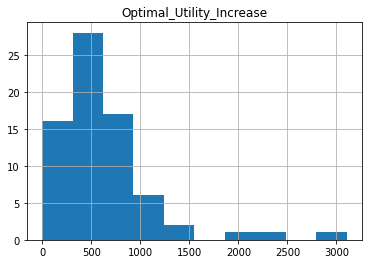

In [0]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('mean').hist()

In [0]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('mean').apply(lambda x: x)
group[group.Optimal_Utility_Increase > 1700]

Optimal_Utility_Increase
Optimal_Affected_Component Optimal_Failure Optimal_Rule                              
Query Service              CF1             RestartComponent               2219.978165
                           CF2             RestartComponent               2087.293458
                           CF5             AddReplica                     3102.656684

## Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e86520128>]],
      dtype=object)

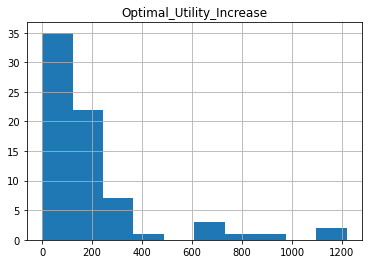

In [0]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('median').hist()

In [0]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('median').apply(lambda x: x)
group[group.Optimal_Utility_Increase > 550]

Optimal_Utility_Increase
Optimal_Affected_Component Optimal_Failure Optimal_Rule                                 
Category Item Filter       CF5             AddReplica                         665.719122
Future Sales Item Filter   CF5             AddReplica                         960.823229
Query Service              CF1             RestartComponent                   616.342395
                           CF2             RestartComponent                   638.460292
                           CF5             AddReplica                        1218.511276
Recommendation Item Filter CF1             RestartComponent                  1190.805189
                           CF3             HwRedeployComponent                769.139019

## Mode

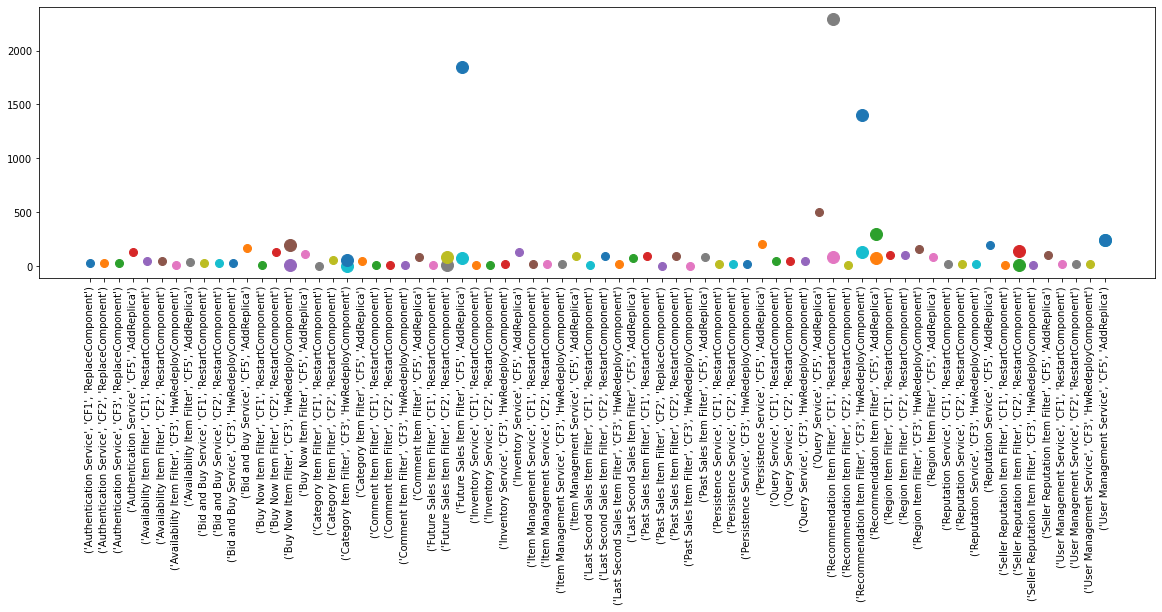

Outliers:
["('Future Sales Item Filter', 'CF5', 'AddReplica')", 1850.09346]
["('Query Service', 'CF5', 'AddReplica')", 498.2634396000001]
["('Recommendation Item Filter', 'CF1', 'RestartComponent')", 2292.93025]
["('Recommendation Item Filter', 'CF3', 'HwRedeployComponent')", 1405.2578449999999]


In [4]:
high_values = []

groups = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(pd.Series.mode).apply(lambda x: x)
fig, ax = plt.subplots(figsize=(20,5))
for index, row in groups.iterrows():
  if isinstance(row['Optimal_Utility_Increase'], numpy.ndarray):
      for value in row['Optimal_Utility_Increase']:
        ax.plot(str(index), value, marker='o', linestyle='', ms=12, label=str(index))
        if value >= 400:
          high_values.append([str(index), value])
  else:
    ax.plot(str(index), row['Optimal_Utility_Increase'], marker='o', linestyle='', ms=8, label=str(index))
    if row['Optimal_Utility_Increase'] >= 400:
      high_values.append([str(index), row['Optimal_Utility_Increase']])

plt.xticks(rotation='vertical')
plt.show()

print('Outliers:')
for value in high_values:
  print(value)

## standard deviation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e8478ca20>]],
      dtype=object)

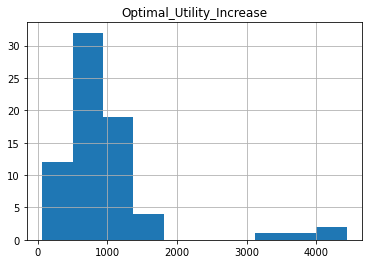

In [0]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('std').hist()

In [0]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('std').apply(lambda x: x)
group[group.Optimal_Utility_Increase > 2000]

Optimal_Utility_Increase
Optimal_Affected_Component Optimal_Failure Optimal_Rule                                 
Query Service              CF1             RestartComponent                  4433.458518
                           CF2             RestartComponent                  4227.087309
                           CF3             HwRedeployComponent               3683.953364
                           CF5             AddReplica                        3549.914299

## skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e84586630>]],
      dtype=object)

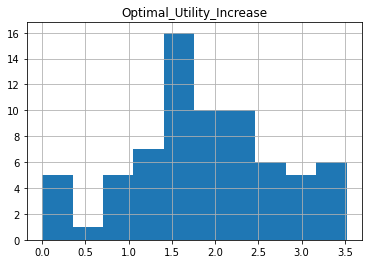

In [0]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('skew').hist()

In [0]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg('skew').apply(lambda x: x)
pd.concat([group[group.Optimal_Utility_Increase < 0.5], group[group.Optimal_Utility_Increase > 3.0]], sort=False)

Optimal_Utility_Increase
Optimal_Affected_Component    Optimal_Failure Optimal_Rule                                 
Category Item Filter          CF5             AddReplica                       9.253720e-03
Future Sales Item Filter      CF5             AddReplica                      -5.802959e-16
Recommendation Item Filter    CF1             RestartComponent                 0.000000e+00
                              CF3             HwRedeployComponent              0.000000e+00
                              CF5             AddReplica                      -2.437595e-16
Bid and Buy Service           CF1             RestartComponent                 3.052766e+00
Last Second Sales Item Filter CF3             HwRedeployComponent              3.021639e+00
Persistence Service           CF1             RestartComponent                 3.013303e+00
                              CF3             HwRedeployComponent              3.411032e+00
Query Service                 CF3             HwRedeployComponent              3.238886e+00
Region Item Filter            CF1             RestartComponent                 3.291487e+00
User Management Service       CF1             RestartComponent                 3.520060e+00
                              CF2             RestartComponent                 3.245972e+00
                              CF3             HwRedeployComponent              3.388782e+00

## kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0353cdff98>]],
      dtype=object)

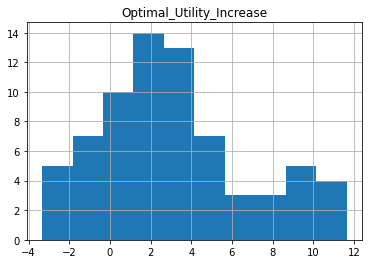

In [5]:
data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(pd.DataFrame.kurt).hist()

In [6]:
# get the outliers
group = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Rule']).agg(pd.DataFrame.kurt).apply(lambda x: x)
pd.concat([group[group.Optimal_Utility_Increase < 0], group[group.Optimal_Utility_Increase > 7]], sort=False)

,,,Optimal_Utility_Increase
Optimal_Affected_Component,Optimal_Failure,Optimal_Rule,
Authentication Service,CF5,AddReplica,-0.284264
Availability Item Filter,CF5,AddReplica,-1.021125
Category Item Filter,CF5,AddReplica,-2.427393
Future Sales Item Filter,CF5,AddReplica,-3.333333
Inventory Service,CF5,AddReplica,-0.602423
Item Management Service,CF5,AddReplica,-0.016349
Last Second Sales Item Filter,CF5,AddReplica,-0.383726
Persistence Service,CF5,AddReplica,-0.772950
Recommendation Item Filter,CF1,RestartComponent,-3.333333


# Result:

The combination of <Query Service,CF5,AddReplica> shows particular high values (compare Mean and Median Results) while the distribution is very large. 